In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
# Load the MNIST data
dataset = keras.datasets.mnist
(X_tr,Y_tr),(X_te,Y_te) = dataset.load_data()

In [3]:
X_tr.shape,Y_tr.shape,X_te.shape,Y_te.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train = []
X_test = []
for i in range(len(X_tr)):
    resized = cv2.resize(X_tr[i],(60,60))
    X_train.append(resized)
    
for i in range(len(X_te)):
    resized = cv2.resize(X_te[i],(60,60)) 
    X_test.append(resized)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
X_train.shape,X_test.shape

(TensorShape([60000, 60, 60]), TensorShape([10000, 60, 60]))

0


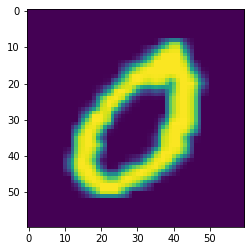

In [5]:
num = np.random.randint(0,len(X_train))
plt.imshow(X_train[num])
print(Y_tr[num])

In [6]:
X_train,X_test = X_train/255,X_test/255

In [7]:
print(X_train[0],X_test[0])

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60, 60), dtype=float64) tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60, 60), dtype=float64)


In [8]:
X_train = tf.reshape(X_train,[-1,60,60,1])
X_test = tf.reshape(X_test,[-1,60,60,1])

In [9]:
# Convert the labels to one-hot-encoding
Y_tr = keras.utils.to_categorical(Y_tr)
Y_te = keras.utils.to_categorical(Y_te)
print(Y_te[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
CNN_model = Sequential()
CNN_model.add(Conv2D(32,(3,3),activation = "relu",input_shape = (60,60,1)))
CNN_model.add(MaxPooling2D((2,2)))

CNN_model.add(Conv2D(32,(3,3),activation = "relu"))
CNN_model.add(MaxPooling2D((2,2)))

CNN_model.add(Conv2D(32,(3,3),activation = "relu"))
CNN_model.add(MaxPooling2D((2,2)))

CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation = "relu"))
CNN_model.add(Dense(64, activation = "relu"))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(32, activation = "relu"))
CNN_model.add(Dense(10, activation = "softmax"))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0

In [11]:
CNN_model.compile(loss = keras.losses.CategoricalCrossentropy(),
                 optimizer = keras.optimizers.SGD(),
                  metrics = ["accuracy"])

In [12]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

ES = EarlyStopping(monitor = "val_loss", patience = 5)
MC = ModelCheckpoint("./bestmodel.h5", monitor = "val_accuracy", save_best_only = True)

cbs = [ES, MC]

In [13]:
my_model = CNN_model.fit(X_train,Y_tr,validation_split = 0.2, shuffle = True, epochs = 50, batch_size = 32, callbacks = cbs)

Epoch 1/50
1500/1500 [==============================] - 56s 37ms/step - loss: 0.9671 - accuracy: 0.6690 - val_loss: 0.1647 - val_accuracy: 0.9517
Epoch 2/50
1500/1500 [==============================] - 56s 38ms/step - loss: 0.1900 - accuracy: 0.9421 - val_loss: 0.1048 - val_accuracy: 0.9691
Epoch 3/50
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1380 - accuracy: 0.9586 - val_loss: 0.0826 - val_accuracy: 0.9741
Epoch 4/50
1500/1500 [==============================] - 76s 51ms/step - loss: 0.1098 - accuracy: 0.9676 - val_loss: 0.0770 - val_accuracy: 0.9760
Epoch 5/50
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.0805 - val_accuracy: 0.9750
Epoch 6/50
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0836 - accuracy: 0.9748 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 7/50
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0570 -

KeyboardInterrupt: 

In [14]:
CNN_model.evaluate(X_test,Y_te)

313/313 [==============================] - 4s 14ms/step - loss: 0.0411 - accuracy: 0.9889


[0.04110384359955788, 0.9889000058174133]

1/1 [==============================] - 0s 21ms/step
{'1': 100.0, '0': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0}


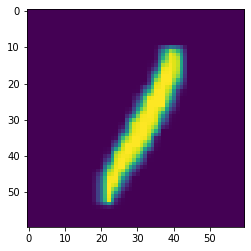

In [35]:
num = np.random.randint(0,len(X_test))
Y_pred = CNN_model.predict(tf.reshape(X_test[num],[1,60,60,1]))
plt.imshow(X_test[num])
Y_pred = tf.reshape(Y_pred,[-1])

predictions = []
for ele in Y_pred:
    predictions.append(ele.numpy())
    
digits = {}
op_l = []
for i,elem in enumerate(predictions):
    op_l.append((str(i),round(100*elem,2)))
 
sorted_list = sorted(op_l, key = lambda ele:ele[1],reverse = True)
for k,v in sorted_list:
    digits[k] = v
print(digits)

In [16]:
# Load our best model
best_mod = keras.models.load_model("./bestmodel.h5")

In [17]:
best_mod.evaluate(X_test,Y_te)

313/313 [==============================] - 4s 13ms/step - loss: 0.0367 - accuracy: 0.9892


[0.03666648268699646, 0.9891999959945679]